# MultiClass Classification with Sklearn

In [2]:
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.join('..', 'src')))
sys.setrecursionlimit(20500)
import pandas as pd


from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

'''import helpers'''
import tools as tools

In [3]:
'''import processed data'''
df = pd.read_csv(os.path.abspath(os.path.join('..', 'data/processed/'))+'/data_processed.csv')

In [4]:
df.head(5)

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,text_clean
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"""From a gender perspective, Paulgaard points o...",5,1,8,0.777778,from a gender perspective paulgaard points out...
1,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,8,0.777778,the average figure also masks large difference...
2,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000,the israel oceanographic and limnological rese...
3,10.18356/805b1ae4-en,001180f5dd9a821e651ed51e30d0cf8c,Previous chapters have discussed ways to make ...,2,0,3,1.000000,previous chapters have discussed ways to make ...
4,10.1017/S0008423907070424,00162fc8346ca9cd525d8f87ac2b5352,The “War on Terror” and the Framework of Inter...,16,0,7,1.000000,the war on terror and the framework of interna...


In [5]:
'''split test train'''
X_train, X_test, y_train, y_test = train_test_split(df['text_clean'],
                                                    df['sdg'].values,
                                                    test_size = .15,
                                                    stratify=df['sdg'].values,
                                                    random_state = 1,
                                                    shuffle = True)
print('train size:', len(X_train))
print('test size:', len(X_test))

assert len(set(y_train)) == len(set(y_test)), "Unequal splits with some labels missing"

train size: 17600
test size: 3107


In [6]:
'''extract features using tfidf vecorization:'''
vectorizer = TfidfVectorizer(ngram_range = (1,2),min_df = 0.01, max_df = 0.95)
vect = vectorizer.fit(X_train)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

/Users/jonas/miniconda3/envs/sdg/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 89.0 %
Test accuracy: 83.0 %


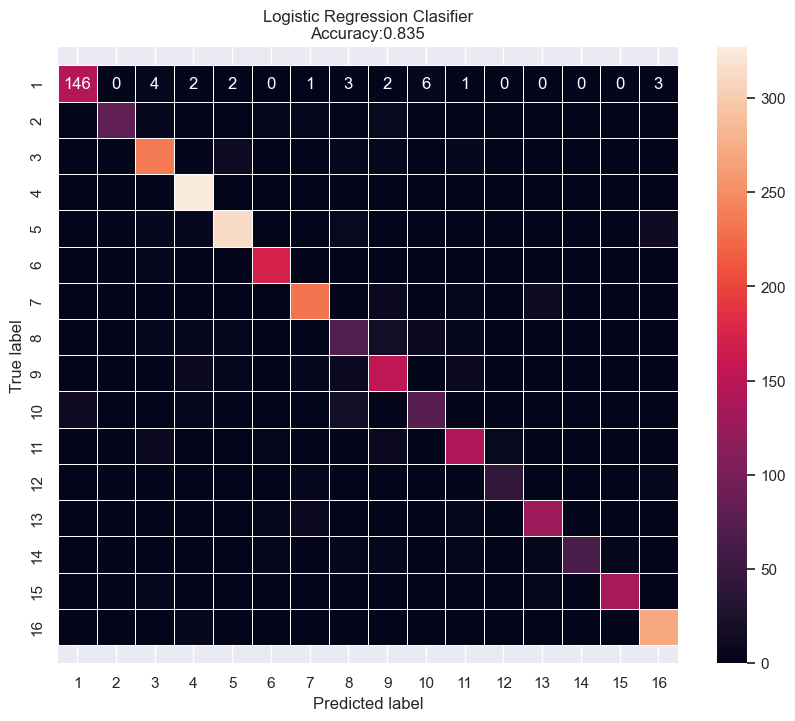

In [7]:
clf = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', penalty='l2').fit(X_train, y_train)
print('Training accuracy:', clf.score(X_train, y_train).round(2)*100, "%")
print('Test accuracy:', clf.score(X_test, y_test).round(2)*100, "%")
y_hat = clf.predict(X_test)
tools.show_labels(y_test, y_hat, title = 'Logistic Regression Clasifier', class_range = (1,17))

In [9]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           1       0.83      0.86      0.85       170
           2       0.81      0.71      0.76       114
           3       0.81      0.88      0.85       268
           4       0.89      0.96      0.92       339
           5       0.90      0.89      0.90       351
           6       0.91      0.90      0.90       193
           7       0.86      0.87      0.87       266
           8       0.58      0.56      0.57       124
           9       0.69      0.75      0.72       204
          10       0.78      0.63      0.70       120
          11       0.77      0.78      0.77       184
          12       0.75      0.62      0.68        69
          13       0.83      0.82      0.82       157
          14       0.88      0.60      0.71       108
          15       0.91      0.86      0.88       157
          16       0.89      0.95      0.92       283

    accuracy                           0.83      3107
   macro avg       0.82   

In [11]:
'''check highest predictors to see if model learnt to make sense out of SDGs'''
df_lambda = tools.get_topwords(clf, vectorizer, n = 10, n_models = 16, show_idxmax = True)
print(f'Shape:{df_lambda.shape}')
display(df_lambda)

sdg_1          poverty
sdg_2             food
sdg_3           health
sdg_4        education
sdg_5            women
sdg_6            water
sdg_7           energy
sdg_8       employment
sdg_9       innovation
sdg_10      inequality
sdg_11           urban
sdg_12           waste
sdg_13         climate
sdg_14       fisheries
sdg_15    biodiversity
sdg_16             law
dtype: object

Shape:(16, 1)


,Keywords
sdg_1,"[(poverty, 11.644), (poor, 6.769), (children, ..."
sdg_2,"[(food, 9.425), (agricultural, 7.482), (farmer..."
sdg_3,"[(health, 10.711), (care, 6.776), (patients, 5..."
sdg_4,"[(education, 10.114), (students, 9.137), (scho..."
sdg_5,"[(women, 13.266), (gender, 10.762), (girls, 5...."
sdg_6,"[(water, 14.374), (groundwater, 6.041), (river..."
sdg_7,"[(energy, 10.896), (electricity, 8.764), (powe..."
sdg_8,"[(employment, 5.699), (labour, 5.196), (worker..."
sdg_9,"[(innovation, 6.561), (infrastructure, 6.29), ..."
sdg_10,"[(inequality, 9.234), (income, 4.676), (worker..."
